# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [119]:
heroes_df = pd.read_csv('heroes_information.csv', index_col = 0)
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [120]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [122]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [123]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [124]:
heroes_df['Alignment'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Alignment'].value_counts()

good       496
bad        207
neutral     24
Name: Alignment, dtype: int64

In [125]:
heroes_df['Eye color'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Eye color'].value_counts()

blue                       225
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
yellow (without irises)      2
violet                       2
amber                        2
yellow / red                 1
white / red                  1
blue / white                 1
yellow / blue                1
bown                         1
silver                       1
indigo                       1
green / blue                 1
Name: Eye color, dtype: int64

In [126]:
heroes_df['Race'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Race'].value_counts()

Human                208
Mutant                63
God / Eternal         14
Cyborg                11
Human / Radiation     11
                    ... 
Yautja                 1
Gungan                 1
Human-Vuldarian        1
Korugaran              1
Zombie                 1
Name: Race, Length: 61, dtype: int64

In [127]:
heroes_df['Gender'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Gender'].value_counts()

Male      505
Female    200
Name: Gender, dtype: int64

In [128]:
heroes_df['Hair color'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Hair color'].value_counts()

Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
Blue                  3
black                 3
Yellow                2
Orange                2
Pink                  1
Magenta               1
Orange / White        1
Brownn                1
Indigo                1
Brown / Black         1
Black / Blue          1
Gold                  1
Red / White           1
Red / Grey            1
Red / Orange          1
Name: Hair color, dtype: int64

In [129]:
heroes_df['Skin color'].replace(to_replace = "-", value = np.nan, inplace = True)
heroes_df['Skin color'].value_counts()

green             21
blue               9
red                9
white              7
silver             5
grey               5
gold               3
purple             3
yellow             2
pink               2
orange             1
black              1
blue-white         1
red / black        1
gray               1
orange / white     1
Name: Skin color, dtype: int64

In [130]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [131]:
heroes_df['Height'].value_counts()
# -99 is a place holder
heroes_df['Weight'].value_counts()
# -99 is a place holder

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
         ... 
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [132]:
heroes_df['Height'].replace(to_replace = -99.0, value = np.nan, inplace = True)

In [133]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        705 non-null object
Eye color     562 non-null object
Race          430 non-null object
Hair color    562 non-null object
Height        517 non-null float64
Publisher     719 non-null object
Skin color    72 non-null object
Alignment     727 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [134]:
heroes_df['Weight'].replace(to_replace = -99.0, value = np.nan, inplace = True)

In [135]:
heroes_df['Publisher'].replace(to_replace = ab, value = "Other", inplace = True)

In [136]:
ab = list(heroes_df['Publisher'].unique())

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [137]:
heroes_df.drop_duplicates(inplace = True)

In [138]:
heroes_df.isna().sum()

name            0
Gender         29
Eye color     171
Race          304
Hair color    171
Height        216
Publisher       0
Skin color    661
Alignment       7
Weight        238
dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [139]:
heroes_df['Alignment'].value_counts(normalize = True)

good       0.681818
bad        0.285124
neutral    0.033058
Name: Alignment, dtype: float64

In [140]:
for col in heroes_df.columns:
    print(f"{col} \n{heroes_df[col].value_counts(normalize = True, dropna = False)}\n")

name 
Spider-Man         0.004093
Angel              0.002729
Captain Marvel     0.002729
Black Canary       0.002729
Blizzard           0.002729
                     ...   
Tinkerer           0.001364
Silk Spectre II    0.001364
Sylar              0.001364
Hawkeye II         0.001364
Penguin            0.001364
Name: name, Length: 715, dtype: float64

Gender 
Male      0.687585
Female    0.272851
NaN       0.039563
Name: Gender, dtype: float64

Eye color 
blue                       0.306958
NaN                        0.233288
brown                      0.171896
green                      0.099591
red                        0.062756
black                      0.031378
yellow                     0.025921
white                      0.023192
hazel                      0.008186
grey                       0.008186
purple                     0.005457
gold                       0.004093
yellow (without irises)    0.002729
violet                     0.002729
amber                      0.002729

In [141]:
heroes_df.drop(axis = 1, columns = 'Race', inplace = True)

In [142]:
heroes_df.loc[heroes_df['name'] == "Spider-Man"]

,name,Gender,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight
622,Spider-Man,Male,hazel,Brown,178.0,Marvel Comics,NaN,good,74.0
623,Spider-Man,NaN,red,Brown,178.0,Marvel Comics,NaN,good,77.0
624,Spider-Man,Male,brown,Black,157.0,Marvel Comics,NaN,good,56.0


In [143]:
heroes_df.drop(['Skin color'], axis = 1, inplace = True)

In [144]:
heroes_df['Weight'].describe()

count    495.000000
mean     112.252525
std      104.151142
min        2.000000
25%       61.000000
50%       81.000000
75%      108.000000
max      900.000000
Name: Weight, dtype: float64

In [145]:
heroes_df['Weight'].fillna(value = heroes_df['Weight'].median(), inplace = True)
heroes_df.isna().sum()

name            0
Gender         29
Eye color     171
Hair color    171
Height        216
Publisher       0
Alignment       7
Weight          0
dtype: int64

In [146]:
heroes_df['Height'].describe()

count    517.000000
mean     186.726306
std       59.251895
min       15.200000
25%      173.000000
50%      183.000000
75%      191.000000
max      975.000000
Name: Height, dtype: float64

In [147]:
heroes_df['Height'].fillna(value = heroes_df['Height'].median(), inplace = True)

In [148]:
heroes_df.dropna(subset = {"Alignment"}, inplace = True)


In [149]:
heroes_df.loc[heroes_df['Eye color'] == 'brown', heroes_df['Hair color'] == 'brown']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [ ]:
df = heroes_df.merge(powers_df, left_on = 'name', right_on = 'hero_names', how = "inner")

In [ ]:
df.head(2)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [ ]:
df_f = df.loc[df['Gender'] == 'Female']
df_m = df.loc[df['Gender'] == 'Male']


In [ ]:
plt.style.use('ggplot')
plt.xkcd()

In [ ]:
fig = plt.figure(figsize = (12,8))

ax1 = plt.subplot(1,2,1)
plt.scatter(df_m['Height'], df_m['Weight'])
ax1.set_title('Male Superheroes')

ax2 = plt.subplot(1,2,2)
plt.scatter(df_f['Height'], df_f['Weight'])
ax2.set_title('Female Superheroes')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [150]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    plt.title(f"{gender} {column_name}")
    pass

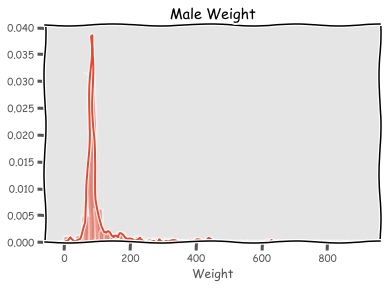

In [151]:
# Male Height
show_distplot(df_m, "Male", "Weight")

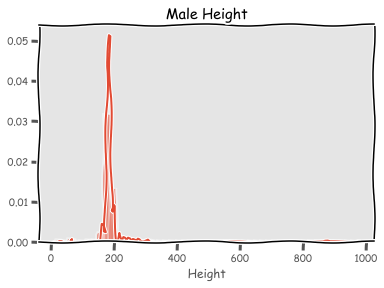

In [152]:
# Male Weight
show_distplot(df_m, "Male", "Height")

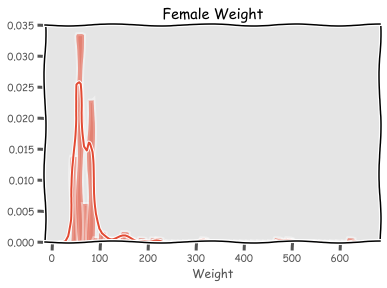

In [156]:
# Female Height
show_distplot(df_f, "Female", "Weight")

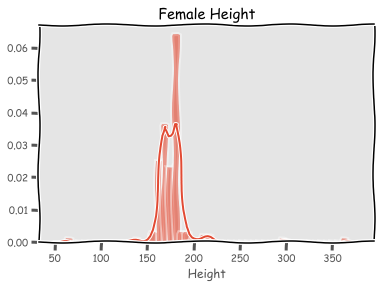

In [155]:
# Female Weight
show_distplot(df_f, "Female", "Height")

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [162]:
powers_dict = {}
for x in list(df.columns)[9:]:
    powers_dict[x] = df[x].sum()

In [177]:
powers_sorted = sorted(powers_dict.items(), key= lambda kv: kv[1])
powers_sorted[-5:]

[('Agility', 242),
 ('Super Speed', 249),
 ('Durability', 259),
 ('Stamina', 291),
 ('Super Strength', 357)]

In [175]:
marvel_only = df[df['Publisher'] == "Marvel Comics"]

In [180]:
marvel_dict = {}
for x in list(marvel_only.columns)[9:]:
    marvel_dict[x] = marvel_only[x].sum()
marvel_sorted = sorted(marvel_dict.items(), key = lambda kv: kv[1])
marvel_sorted[-5:]

[('Agility', 125),
 ('Super Speed', 136),
 ('Stamina', 148),
 ('Durability', 151),
 ('Super Strength', 201)]

In [181]:
DC_only = df[df['Publisher'] == "DC Comics"]

DC_dict = {}
for x in list(DC_only.columns)[9:]:
    DC_dict[x] = DC_only[x].sum()
DC_sorted = sorted(DC_dict.items(), key = lambda kv: kv[1])
DC_sorted[-5:]

[('Durability', 71),
 ('Super Speed', 79),
 ('Flight', 85),
 ('Stamina', 90),
 ('Super Strength', 109)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [244]:
df['name']

0               A-Bomb
1           Abe Sapien
2             Abin Sur
3          Abomination
4              Abraxas
            ...       
648    Yellowjacket II
649               Ymir
650               Yoda
651            Zatanna
652               Zoom
Name: name, Length: 653, dtype: object

In [256]:
# sum of powers in each row
powers_all = {}
for row in list(range(len(df))):
    name = df['name'][row]
    powers_num = list(df.loc[row][9:].value_counts())[1]
    #print("# of SUper Powers:", list(df.loc[row][9:].value_counts())[1])
    powers_all[name] = powers_num
   
    #print(f"{df[row]['name']} has {list(df.loc[row][9:].value_counts())[1]}")
allio = sorted(powers_all.items(), key = lambda x: x[1] ,reverse = True)

#One might assume that these are the most powerful superheroes based on number of superpowers. 
#This, of course, does not account for the degree to which they have that power 
#(i.e. super strength just means stronger than a natural human but the factor by which is not accounted for in this table)


In [267]:
allio = dict(allio)

In [276]:
print(f"Average number of powers : {sum(allio.values())/len(allio)}")

Average number of powers : 8.842767295597485


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data